# Setting up our envionment

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

fatal: destination path 'Monk_Object_Detection' already exists and is not an empty directory.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 15 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=9b7c59bf75e5b9e05c9ceb1df5dc94a298e251b0d68ff94fcfba3d215d906eb5
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-3wp11m51/pycocotools_c5041fa2e074404bbd6ca81a4df9ad3e
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-3wp11m51/pycocotools_c5041fa2e074404bbd6ca81a4df9ad3e
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263846 sha256=e90d134e4ec9212cbb301dacb6d7455f0a9d1b4a81d2701f9da66e042c3c51d0
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [ ]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91 kB 1.2 MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=7883ff78cefdb728f4ee93a28f4dc2138462b5738fcdcede008cbdd45a290772
  Stored in directory: /tmp/pip-ephem-wheel-cache-i0xtra4e/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format
!curl -L "https://app.roboflow.com/ds/XsBK6R2Mcb?key=wtsvu7bTwf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0   1970      0 --:--:-- --:--:-- --:--:--  1970
100 30.5M  100 30.5M    0     0  43.4M      0 --:--:-- --:--:-- --:--:-- 43.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/P1010034_jpg.rf.2f629f6d82a2bcf86a1be67426b71272.jpg  
 extracting: test/P1010044_jpg.rf.494be4b1f6b0dcda7804156bda85f7e1.jpg  
 extracting: test/P1010049_jpg.rf.b93f45ba4f79e602af8f657e52cbc3e6.jpg  
 extracting: test/P5280029_jpg.rf.8f368a27ac268ac0b06f8121a9a89312.jpg  
 extracting: test/P5280049_jpg.rf.5ae31b9e53673c5a495490c75c77a4fd.jpg  
 extracting: test/P5280063_jpg.rf.39e540a9f1853f6b3b13c9417add5271.jpg  
 extracting: test/P5280079_jpg.rf.897dd22e039b0531122d59194fb53285.jpg  
 extracting: test/P5280098_jpg.rf.0245228c9e8802cc52c94

In [ ]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  README.roboflow.txt  test/   valid/
README.dataset.txt      sample_data/         train/


In [ ]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

_annotations.coco.json
P1010001_jpg.rf.3fd71e2a075c689a14f1582626670c2e.jpg
P1010001_jpg.rf.ab93a07895b03ed402801fc5b2c7b7e4.jpg
P1010001_jpg.rf.cee16bff807a84f47278d3f3c7c756f5.jpg
P1010002_jpg.rf.04af1cfa9b5da18d281a69934ffa067b.jpg
P1010002_jpg.rf.8bb96c9151a3e61381e3a2f745f3a7b9.jpg
P1010002_jpg.rf.a749dbc3841cfb06389be2f2fd1ce59d.jpg
P1010003_jpg.rf.62b6fd4cd651cab4e12624d8ec8dc720.jpg
P1010003_jpg.rf.eaba0b86eebdd29b4194bb59eeebdba7.jpg
P1010003_jpg.rf.fe360adbdedc9be94072a4894a88681f.jpg
P1010004_jpg.rf.529b635077cc0652d7177d3321478f59.jpg
P1010004_jpg.rf.9ba8788cd6a763208c5e64667d16d478.jpg
P1010004_jpg.rf.acfe7c68290659a835512064bd841b14.jpg
P1010005_jpg.rf.12fcb4eb1f275f639b2643ec5aa4cada.jpg
P1010005_jpg.rf.a60a8fbcc46dd21e28acdbb70ef8da57.jpg
P1010005_jpg.rf.c6b488efacc166887baf349496e02575.jpg
P1010006_jpg.rf.6e5b97a27bfbd47db3d198fd4b03791a.jpg
P1010006_jpg.rf.9c42e916b40dd20cd24d96641f005cfe.jpg
P1010006_jpg.rf.bce02c38c455fb08b3e7a55c4d5de0cd.jpg
P1010007_jpg.rf.693c4e8

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir Chess
!mkdir Chess/annotations
!mkdir Chess/Annotations
!mkdir Chess/Images

In [ ]:
%cp train/_annotations.coco.json Chess/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg Chess/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Chess";
img_dir = "./";
set_dir = "Images";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=10, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a consta

CPU times: user 1h 42min 24s, sys: 1min 23s, total: 1h 43min 47s
Wall time: 1h 43min 52s


# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['Detectors', 'number_plate']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.210s)
CPU times: user 238 ms, sys: 3.01 ms, total: 241 ms
Wall time: 239 ms


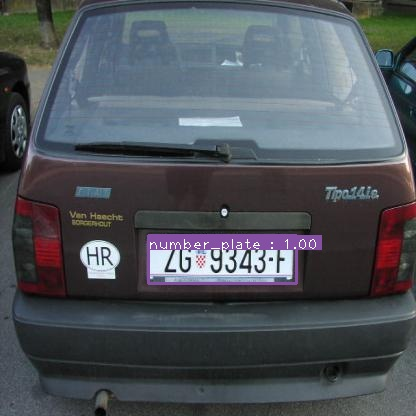

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

# Export Trained Weights

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
